<a href="https://colab.research.google.com/github/ChrisLezama/Telecom_2_Challenge_3/blob/main/TelecomX2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

## Extrayendo datos del archivo JSON

In [61]:
#Convirtiendo Data Frame de pandas
import pandas as pd


data=pd.read_json("/TelecomX_Data.json")
data.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


De estos datos es posible apreciar que algunos tienen mas datos dentro por lo que se debe de normalizar el archivo JSON

#🔧 Transformación

##Normalizacion del archivo JSON

In [62]:
columns_to_normalize = ['customer','phone', 'internet', 'account']

for col in columns_to_normalize:
    normalized_data = pd.json_normalize(data[col])

    # Cconcatenando las columnas para reemplazar en la tabal original
    data = pd.concat([data.drop(col, axis=1), normalized_data], axis=1)

columnas= list(data.columns)
print(columnas)

data.head()


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Seleccion de columnas con las que trabajar

In [63]:

columnas= ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Charges.Monthly', 'Charges.Total']
data_analyze=data[columnas]
data_analyze.head(10)






,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,90.45,5957.9


## Revision de incoherencias

In [64]:
import numpy as np
#Revision de duplicados en ID
data_analyze["customerID"].duplicated().sum()

#Conversion de Datos
data_analyze['Charges.Total'] = data_analyze['Charges.Total'].replace(' ', np.nan)
data_analyze = data_analyze.astype({"Charges.Monthly": "float64", "Charges.Total": "float64"})

data_analyze.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   Churn            7267 non-null   object 
 2   gender           7267 non-null   object 
 3   SeniorCitizen    7267 non-null   int64  
 4   Partner          7267 non-null   object 
 5   Dependents       7267 non-null   object 
 6   tenure           7267 non-null   int64  
 7   Charges.Monthly  7267 non-null   float64
 8   Charges.Total    7256 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 511.1+ KB


/tmp/ipython-input-1396014474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analyze['Charges.Total'] = data_analyze['Charges.Total'].replace(' ', np.nan)


## Manejo de Inconsistencias

In [65]:
col_replace=['ID', 'Dejo', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses', 'Cargos_Mensuales', 'Cargos_Totales']

data_analyze.rename(columns=dict(zip(data_analyze.columns, col_replace)), inplace=True)
data_analyze.head()



,ID,Dejo,Genero,Adulto_Mayor,Pareja,Dependientes,Meses,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,83.9,267.40


## Columna de Costo Diario

In [66]:
data_analyze['Costo_Diario'] = data_analyze['Cargos_Mensuales'] / 30
data_analyze.head()

,ID,Dejo,Genero,Adulto_Mayor,Pareja,Dependientes,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,83.9,267.40,2.796667


# Estandarizacion de la columna Dejo


In [67]:
import numpy as np
data_analyze.loc[:, 'Dejo'] = data_analyze['Dejo'].replace({'No': 0, 'Yes': 1, '': np.nan})
data_analyze.head()

data_analyze.info()
data_analyze['Dejo']=data_analyze['Dejo'].astype("Int64")
data_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7267 non-null   object 
 1   Dejo              7043 non-null   object 
 2   Genero            7267 non-null   object 
 3   Adulto_Mayor      7267 non-null   int64  
 4   Pareja            7267 non-null   object 
 5   Dependientes      7267 non-null   object 
 6   Meses             7267 non-null   int64  
 7   Cargos_Mensuales  7267 non-null   float64
 8   Cargos_Totales    7256 non-null   float64
 9   Costo_Diario      7267 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 567.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7267 non-null   object 
 1   Dejo        

/tmp/ipython-input-864780055.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_analyze.loc[:, 'Dejo'] = data_analyze['Dejo'].replace({'No': 0, 'Yes': 1, '': np.nan})


## Exportacion de Datos como CSV

In [68]:
data_analyze.to_csv('data_analyze.csv', index=False)

data2= pd.read_csv('data_analyze.csv')
data2.head()

,ID,Dejo,Genero,Adulto_Mayor,Pareja,Dependientes,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,83.9,267.40,2.796667


#📊 Carga y análisis

## Analisis Descriptivo

In [69]:
data_analyze.describe()

,Dejo,Adulto_Mayor,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
count,7043.0,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.26537,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.441561,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.0,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.0,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.0,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,1.0,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.0,1.000000,72.000000,118.750000,8684.800000,3.958333


## Analisis Grafico Relacional de gente que Dejo la Empresa

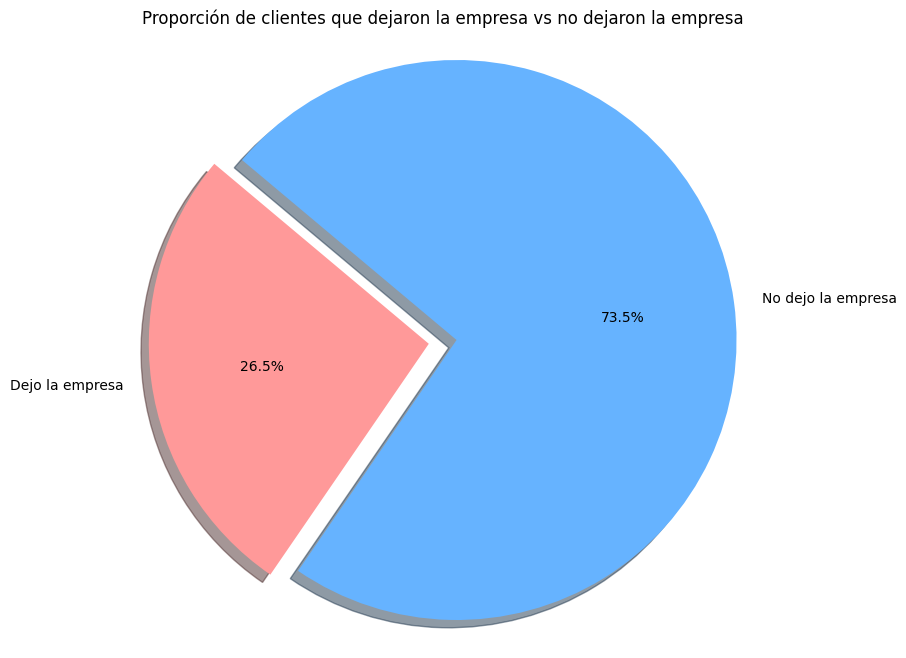

In [70]:
data_analyze.head()
import matplotlib.pyplot as plt


count1=data_analyze[data_analyze["Dejo"]==1].count()
count2=data_analyze[data_analyze["Dejo"]==0].count()

labels = ['Dejo la empresa', 'No dejo la empresa']
sizes = [count1['Dejo'], count2['Dejo']] # Using 'Dejo' as the column name for counts
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporción de clientes que dejaron la empresa vs no dejaron la empresa')
plt.show()

## Variables Categoricas

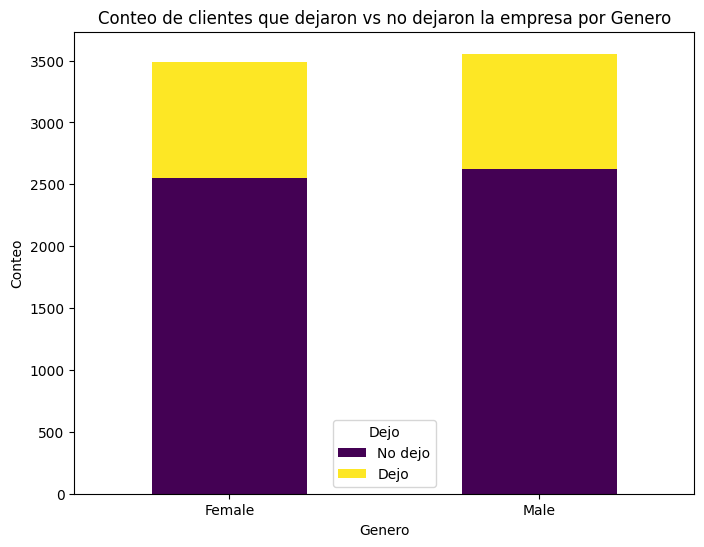

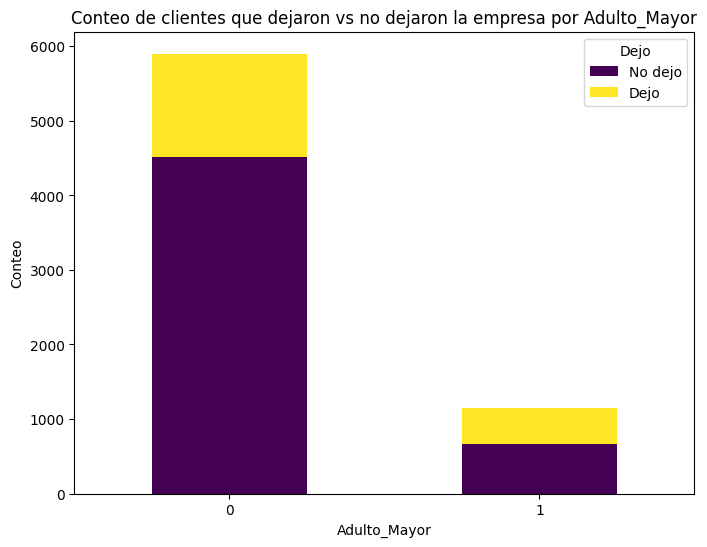

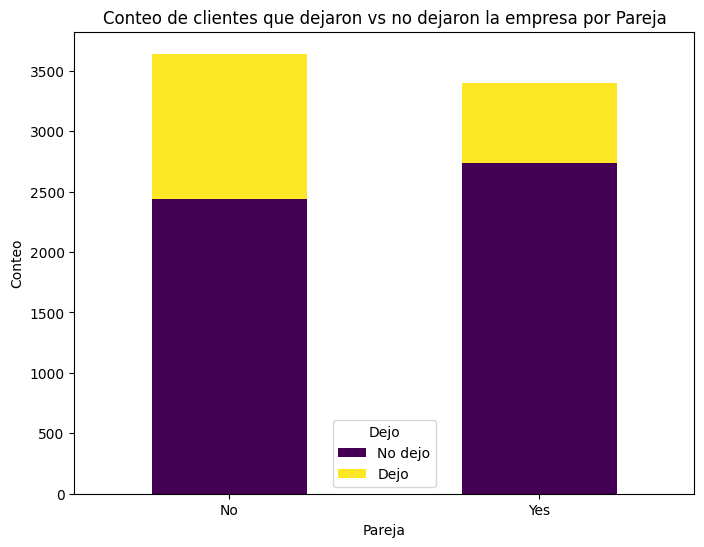

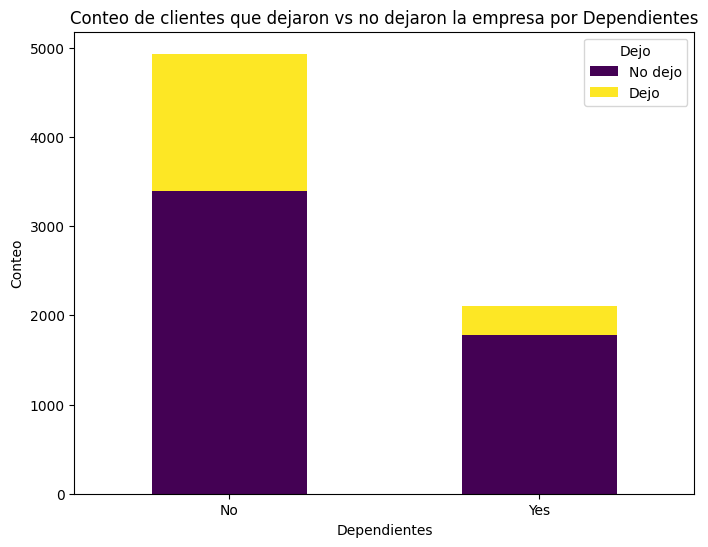

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_columns = ['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))

    grouped_data = data_analyze.groupby([col, 'Dejo']).size().unstack(fill_value=0)

    grouped_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    plt.title(f'Conteo de clientes que dejaron vs no dejaron la empresa por {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=0)
    plt.legend(title='Dejo', labels=['No dejo', 'Dejo'])
    plt.show()

## Variables Numericas

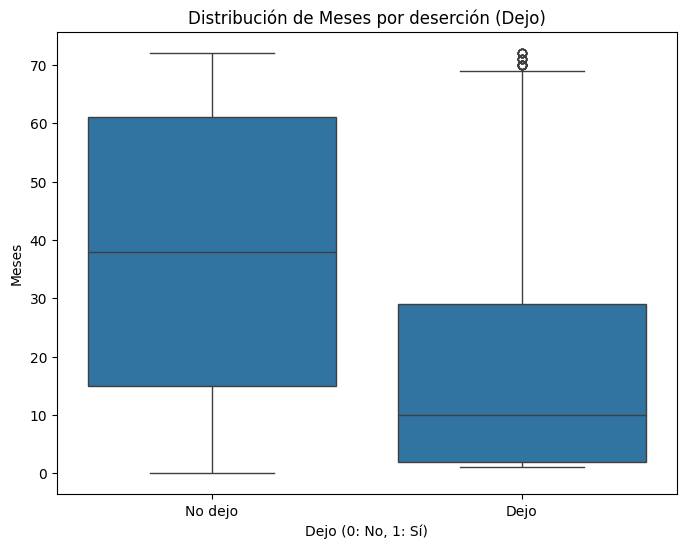

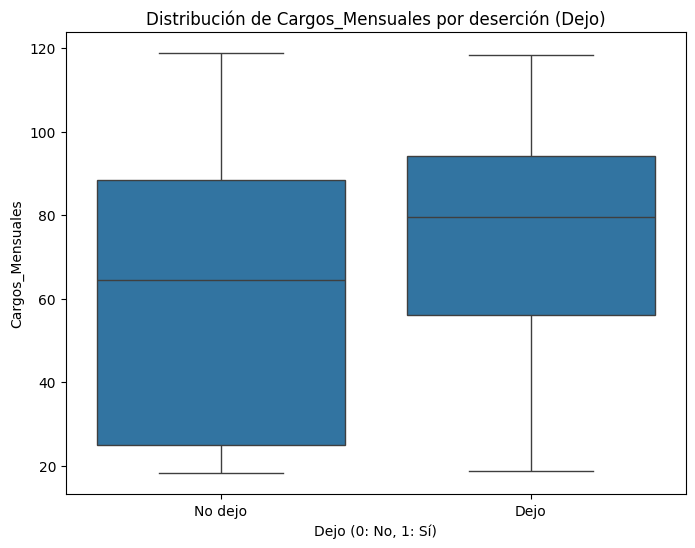

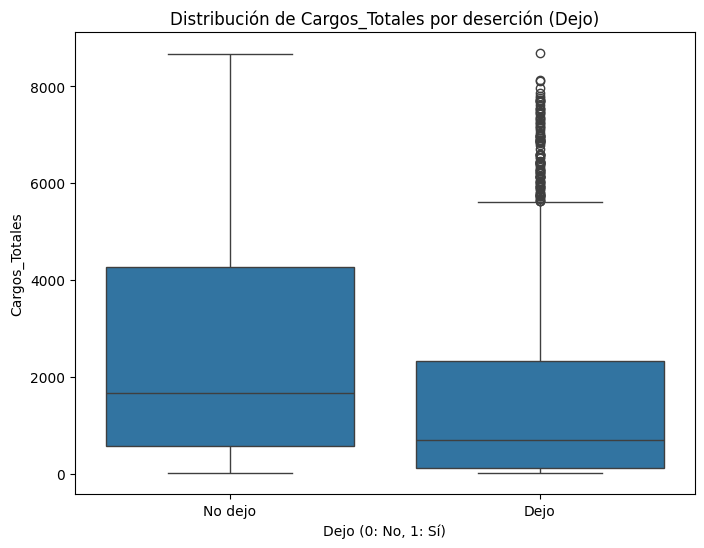

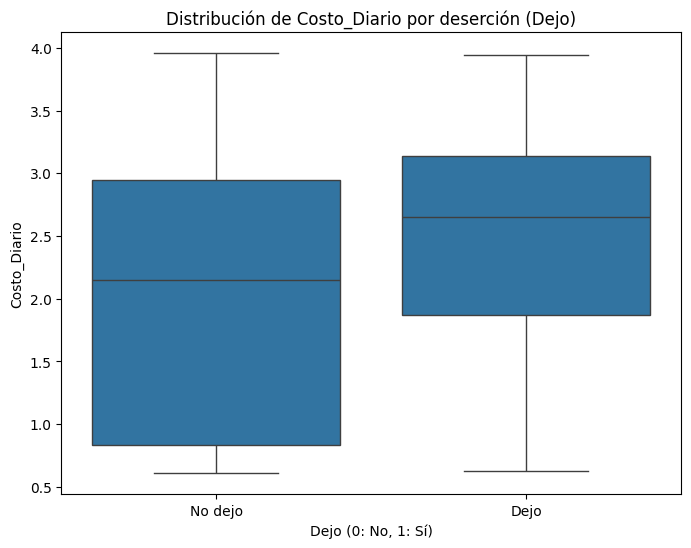

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Costo_Diario']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Dejo', y=col, data=data_analyze)
    plt.title(f'Distribución de {col} por deserción (Dejo)')
    plt.xlabel('Dejo (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No dejo', 'Dejo'])
    plt.show()

## Preparacion de los Datos para su analisis con ML

In [73]:
data2

,ID,Dejo,Genero,Adulto_Mayor,Pareja,Dependientes,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,65.60,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,59.90,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,55.15,742.90,1.838333
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,85.10,1873.70,2.836667
7264,9992-UJOEL,0.0,Male,0,No,No,2,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,67.85,4627.65,2.261667


In [74]:
data2=data2.drop("ID", axis=1)
data2.head()

,Dejo,Genero,Adulto_Mayor,Pareja,Dependientes,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
0,0.0,Female,0,Yes,Yes,9,65.6,593.30,2.186667
1,0.0,Male,0,No,No,9,59.9,542.40,1.996667
2,1.0,Male,0,No,No,4,73.9,280.85,2.463333
3,1.0,Male,1,Yes,No,13,98.0,1237.85,3.266667
4,1.0,Female,1,Yes,No,3,83.9,267.40,2.796667


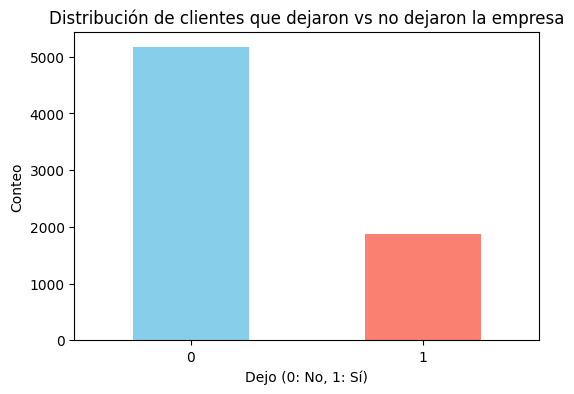

In [83]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data2[['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes']])


dejo_counts = data_analyze['Dejo'].value_counts()

plt.figure(figsize=(6, 4))
dejo_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de clientes que dejaron vs no dejaron la empresa')
plt.xlabel('Dejo (0: No, 1: Sí)')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.show()

## Correlacion de variables

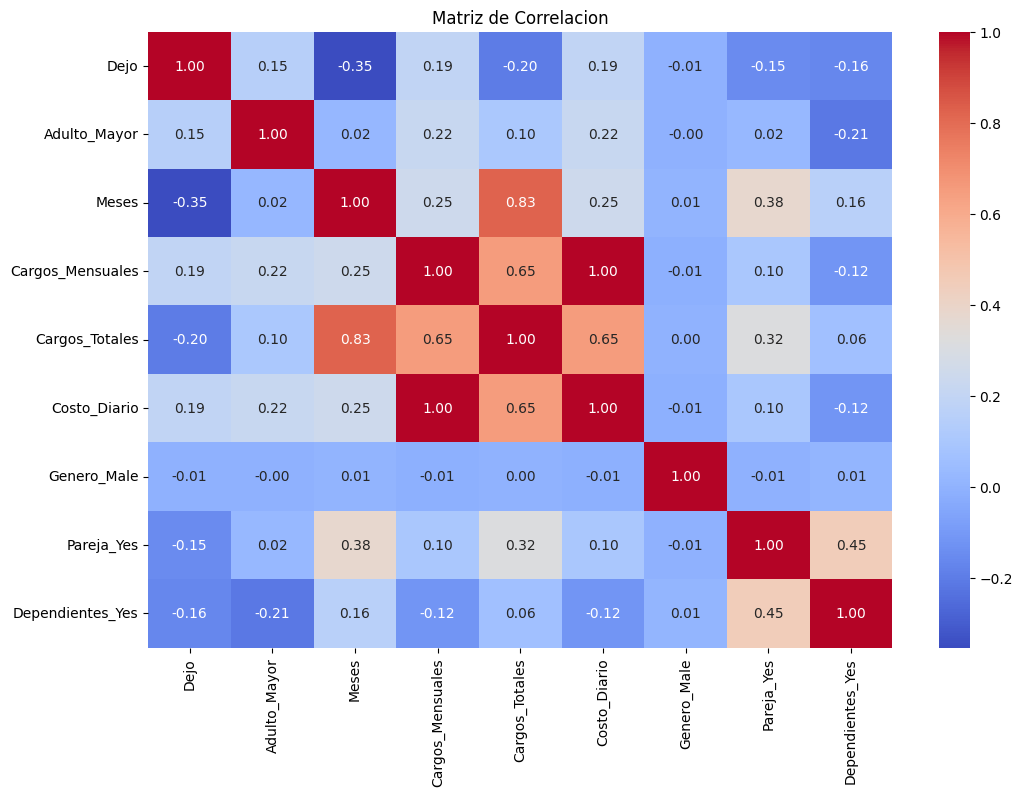

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data2_dummies.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacion')
plt.show()

In [86]:
# Get the correlation of 'Dejo' with all other variables
dejo_correlation = correlation_matrix['Dejo'].sort_values(ascending=False)

# Display the correlations
print("Correlation with 'Dejo':")
print(dejo_correlation)

# Display the absolute correlations sorted
print("\nAbsolute Correlation with 'Dejo':")
print(dejo_correlation.abs().sort_values(ascending=False))

Correlation with 'Dejo':
Dejo                1.000000
Cargos_Mensuales    0.193356
Costo_Diario        0.193356
Adulto_Mayor        0.150889
Genero_Male        -0.008612
Pareja_Yes         -0.150448
Dependientes_Yes   -0.164221
Cargos_Totales     -0.199484
Meses              -0.352229
Name: Dejo, dtype: float64

Absolute Correlation with 'Dejo':
Dejo                1.000000
Meses               0.352229
Cargos_Totales      0.199484
Cargos_Mensuales    0.193356
Costo_Diario        0.193356
Dependientes_Yes    0.164221
Adulto_Mayor        0.150889
Pareja_Yes          0.150448
Genero_Male         0.008612
Name: Dejo, dtype: float64


Con base a este analisis fue posible encontrar que los valores que tienen una linealidad con las personas que dejan a la empresa, son los grupos meses, cargos totales, mensuales y diarios

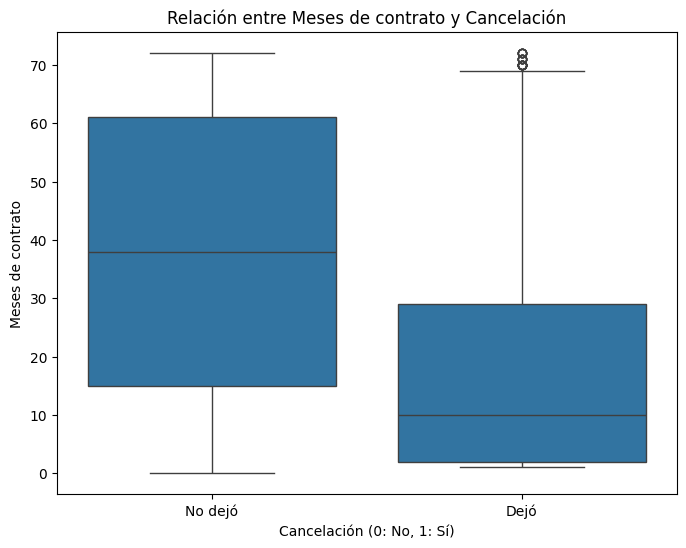

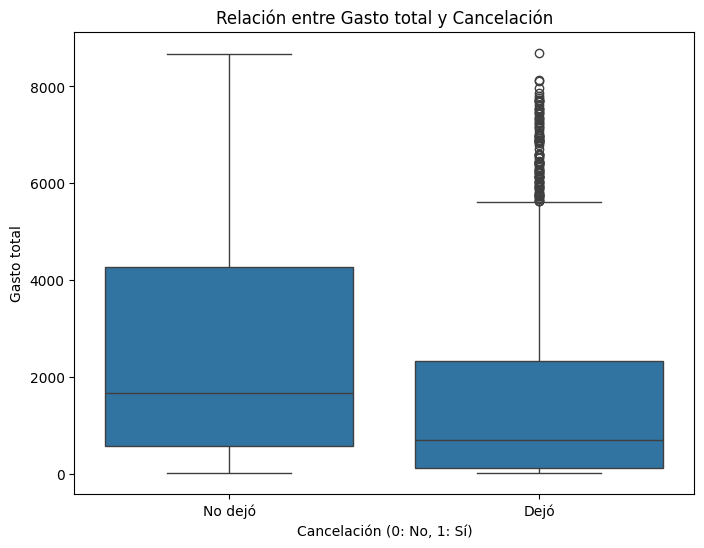

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot para Meses vs Dejo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dejo', y='Meses', data=data_analyze)
plt.title('Relación entre Meses de contrato y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Meses de contrato')
plt.xticks([0, 1], ['No dejó', 'Dejó'])
plt.show()

# Box plot para Cargos_Totales vs Dejo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dejo', y='Cargos_Totales', data=data_analyze)
plt.title('Relación entre Gasto total y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto total')
plt.xticks([0, 1], ['No dejó', 'Dejó'])
plt.show()

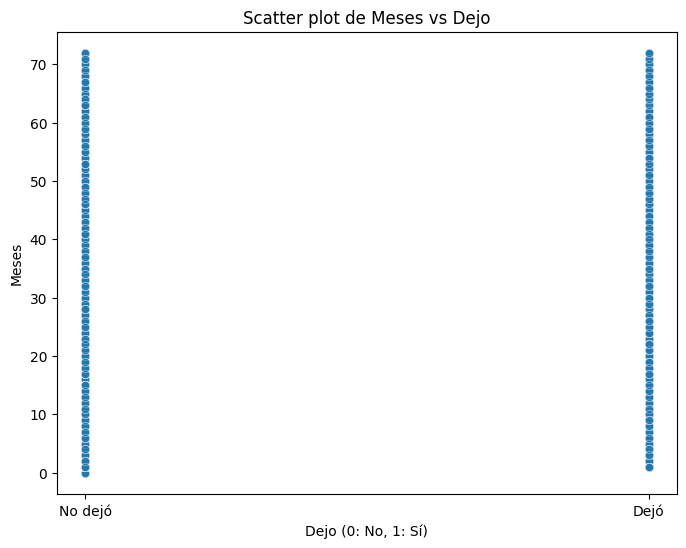

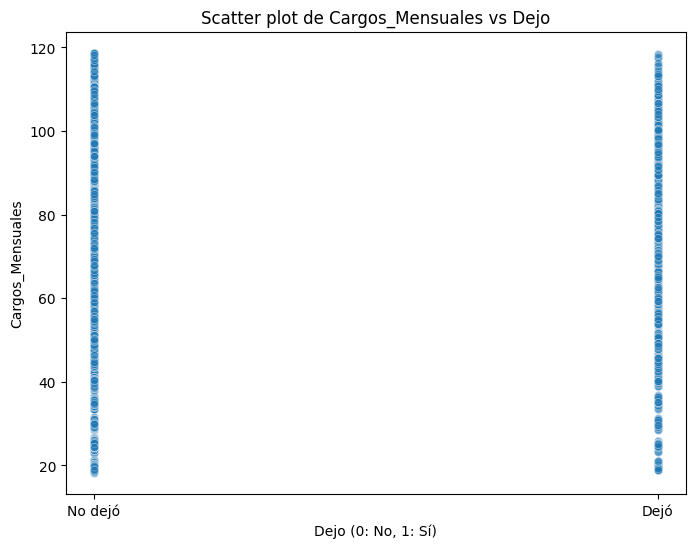

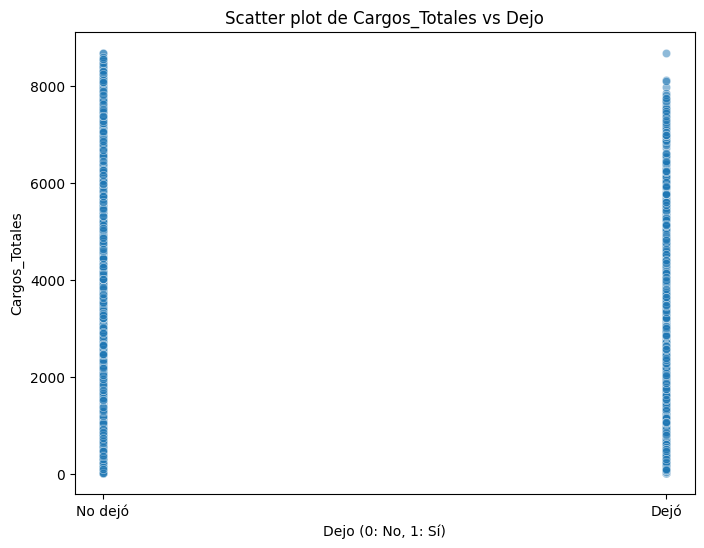

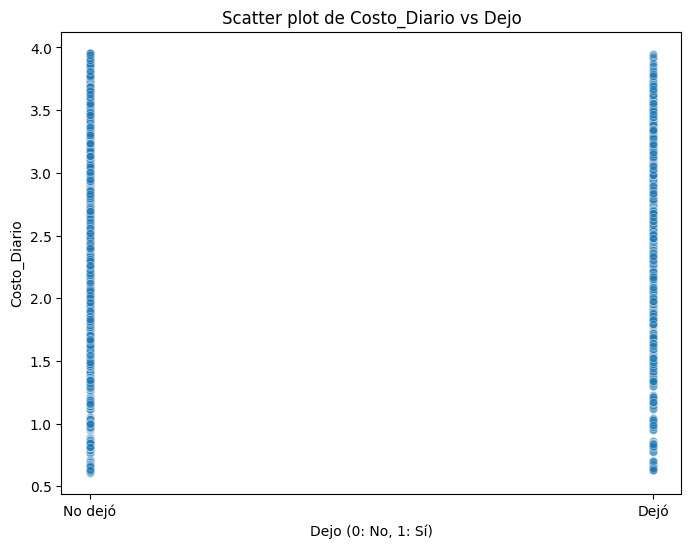

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Costo_Diario']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dejo', y=col, data=data_analyze, alpha=0.5)
    plt.title(f'Scatter plot de {col} vs Dejo')
    plt.xlabel('Dejo (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No dejó', 'Dejó'])
    plt.show()

## Modelado Predictivo

In [97]:
#Modelo Logistico
# Valores Faltantes
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

# eliminando columnas
X_train = X_train.dropna()
y_train = y_train.dropna()

print("Missing values in X_train after dropping:", X_train.isnull().sum().sum())
print("Missing values in y_train after dropping:", y_train.isnull().sum())


train_index_to_keep = X_train.index

nan_indices_X = X.index[X.isnull().any(axis=1)]
nan_indices_y = y.index[y.isnull()]


nan_indices_to_drop = nan_indices_X.union(nan_indices_y)

X_cleaned = X.drop(nan_indices_to_drop)
y_cleaned = y.drop(nan_indices_to_drop)


X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

print("\nTraining set shape after cleaning and re-splitting (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape after cleaning and re-splitting (X_test, y_test):", X_test.shape, y_test.shape)


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_train after dropping: 0
Missing values in y_train after dropping: 0

Training set shape after cleaning and re-splitting (X_train, y_train): (5625, 8) (5625,)
Testing set shape after cleaning and re-splitting (X_test, y_test): (1407, 8) (1407,)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_logistic = logistic_model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, pos_label=1)
recall = recall_score(y_test, y_pred_logistic, pos_label=1)
f1 = f1_score(y_test, y_pred_logistic, pos_label=1)

print(f"Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Logistic Regression Model Evaluation:
Accuracy: 0.7790
Precision: 0.6154
Recall: 0.4492
F1-score: 0.5193


In [100]:
#Modelo KNM

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Haciendo Predicciones
y_pred_knn = knn_model.predict(X_test)

# Calculando las metricas para evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, pos_label=1)
recall_knn = recall_score(y_test, y_pred_knn, pos_label=1)
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1)


print(f"KNN Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")

KNN Model Evaluation:
Accuracy: 0.7591
Precision: 0.5581
Recall: 0.4492
F1-score: 0.4978


In [102]:
# Comparando los modelos
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nKNN Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")

print("\nModel Comparison:")
print(f"Accuracy: Logistic Regression ({accuracy:.4f}) vs KNN ({accuracy_knn:.4f}). La regresion logistica es mejor.")
print(f"Precision: Logistic Regression ({precision:.4f}) vs KNN ({precision_knn:.4f}). La regresion logistica es mejor.")
print(f"Recall: Logistic Regression ({recall:.4f}) vs KNN ({recall_knn:.4f}). Ambos modelos tienen la misma calidad.")
print(f"F1-score: Logistic Regression ({f1:.4f}) vs KNN ({f1_knn:.4f}). La regresion logistica es mejor.")

Logistic Regression Model Evaluation:
Accuracy: 0.7790
Precision: 0.6154
Recall: 0.4492
F1-score: 0.5193

KNN Model Evaluation:
Accuracy: 0.7591
Precision: 0.5581
Recall: 0.4492
F1-score: 0.4978

Model Comparison:
Accuracy: Logistic Regression (0.7790) vs KNN (0.7591). Logistic Regression is better.
Precision: Logistic Regression (0.6154) vs KNN (0.5581). Logistic Regression is better.
Recall: Logistic Regression (0.4492) vs KNN (0.4492). Both models have the same Recall.
F1-score: Logistic Regression (0.5193) vs KNN (0.4978). Logistic Regression is better.


#📄Informe final

# 1. Introduccion

En el presente analisis se realizo un estudio sobre informacion proporcionada por la empresa Telecom X, en la cual se empezo a presentar el problema de un aumento en la deserción por parte de los usuarios, por lo que se nos pidio analizar los datos y proponer estrategias de retención para los usuarios que se empiecen a unir.

#2. Metodologia

Para poder realizar el analisis se siguieron los siguientes pasos:


*   Importacion de los Datos
*   Limpieza, normalizacion y eleccion de las variables a analizar
*   Analisis exploratorio de los datos
*   Visualizacion de patrones y tendencias
*   Generacion de conclusiones y planteamiento de recomendaciones



En esta segunda prueba se realizo un modelo predictivo para ello se compararon dos modelos:
* Modelo Logistico
* Modelo KNM

#3. Resultados Obtenidos

Tras el analisis hecho fue posible apreciar que de la informacion proporcionada, solo el 25.7% del total dejo la empresa, de ese valor las variables personales nos indican que la gente que deja a la empresa no es generalmente por tener dependientes de ellos, la mayoria son hombres y no suelen tener pareja.

Hablando ahora de las variables numericas, las personas que cancelan lo hacen principalmente en los primeros meses, y suelen presentar un valor promedio mas alto que los usuarios de mayor tiempo o que siguen dentro de la empresa. En ese sentido fue posible apreciar que 1 de cada 4 personas abandonan la empresa.

En lo referente a los modelos predictivos, ambos predicen con poca exactitud las posibilidad de saber si la persona se dara de baja, sin embargo es posible apreciar que esto depende principalmente de las variables de meses que lleva con el servicio.

# 4. Recomendaciones

Con base a lo observado y que las personas que abandondan son personas que contratan el servicio por pocos periodos de tiempo, se sugiere revisar la posibilidad de implementar planes a largo plazo de contratacion de servicio que muestren una relativa diferencia en comparacion con una contratacion mensual habitual.